# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Exercise-11.1.-Naive-cross-validation-I" data-toc-modified-id="Exercise-11.1.-Naive-cross-validation-I-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercise 11.1. Naive cross-validation I</a></div><div class="lev1 toc-item"><a href="#Exercise-11.2.-Naive-cross-validation-II" data-toc-modified-id="Exercise-11.2.-Naive-cross-validation-II-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 11.2. Naive cross-validation II</a></div><div class="lev1 toc-item"><a href="#Exercise-11.3.-Boosting-based-cross-validation-I" data-toc-modified-id="Exercise-11.3.-Boosting-based-cross-validation-I-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise 11.3. Boosting based cross-validation I</a></div><div class="lev1 toc-item"><a href="#Exercise-11.4.-Boosting-based-cross-validation-II" data-toc-modified-id="Exercise-11.4.-Boosting-based-cross-validation-II-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 11.4. Boosting based cross-validation II</a></div><div class="lev1 toc-item"><a href="#Exercise-11.5.-Regularization-based-cross-validation" data-toc-modified-id="Exercise-11.5.-Regularization-based-cross-validation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exercise 11.5. Regularization based cross-validation</a></div><div class="lev1 toc-item"><a href="#Exercise-11.6.-Bagging-regression-models" data-toc-modified-id="Exercise-11.6.-Bagging-regression-models-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exercise 11.6. Bagging regression models</a></div><div class="lev1 toc-item"><a href="#Exercise-11.7.-Bagging-two-class-classification-models" data-toc-modified-id="Exercise-11.7.-Bagging-two-class-classification-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exercise 11.7. Bagging two-class classification models</a></div><div class="lev1 toc-item"><a href="#Exercise-11.8.-Bagging-multi-class-classification-models" data-toc-modified-id="Exercise-11.8.-Bagging-multi-class-classification-models-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Exercise 11.8. Bagging multi-class classification models</a></div><div class="lev1 toc-item"><a href="#Exercise-11.9.-K-fold-cross-validation" data-toc-modified-id="Exercise-11.9.-K-fold-cross-validation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exercise 11.9. K-fold cross-validation</a></div><div class="lev1 toc-item"><a href="#Exercise-11.10.-Classification-of-diabetes" data-toc-modified-id="Exercise-11.10.-Classification-of-diabetes-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Exercise 11.10. Classification of diabetes</a></div>

In [18]:
import autograd.numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datapath = '../mlrefined_datasets/nonlinear_superlearn_datasets/'

# Exercise 11.1. Naive cross-validation I

In [2]:
csvname = datapath + 'noisy_sin_sample.csv'

data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

(1, 21)
(1, 21)


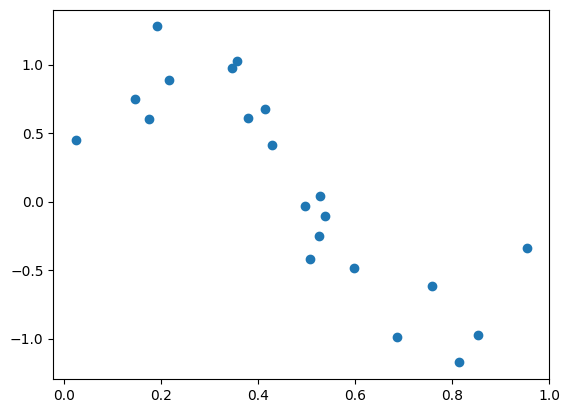

In [3]:
plt.scatter(x, y)

In [4]:
x_new = np.concatenate((np.expand_dims(np.ones(x.shape[1]), axis=0), x), axis=0)

In [5]:
w = (np.linalg.inv(np.dot(x_new, x_new.T)) @ x_new @ y.T).ravel()
y_pred = w @ x_new
y_pred

array([-0.40579946,  0.0285492 ,  0.41941211, -0.5802754 ,  0.79527911,
       -0.71414849, -1.05483928,  0.83578505,  0.90465968,  0.39552524,
       -0.19021194,  0.25179215, -0.04703605,  0.05631224,  0.21991068,
        0.7354408 ,  0.33789149, -0.8099867 ,  1.19930162, -0.02201055,
       -0.01471851])

In [234]:
def split_train_test(x, y, test_ratio):
    shuffled_indices = np.random.permutation(len(x))
    test_set_size = int(len(x)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices] 

def MSE(y_real, y_pred, rmse=True):
    return np.sqrt(np.mean((y_real - y_pred)**2)) if rmse else np.mean((y_real - y_pred)**2)

In [235]:
x_train, x_test, y_train, y_test  = split_train_test(x_new.T, y.ravel(), test_ratio=0.2)

In [236]:
err_train = []
err_test = []
m = 8
for i in range(m):
    if i >= 1:
        poly_train = np.expand_dims(x_train[:, 1]**(i+1), axis=1)
        poly_test = np.expand_dims(x_test[:, 1]**(i+1), axis=1)
        
        x_train = np.concatenate((x_train, poly_train), axis=1)
        x_test = np.concatenate((x_test, poly_test), axis=1)
        
        
        
    
    w = (np.linalg.inv(np.dot(x_train.T, x_train)) @ x_train.T @ y_train).ravel()
    y_pred_test = w @ x_test.T
    etest = MSE(y_test, y_pred_test)
    y_pred_train = w @ x_train.T
    etrain = MSE(y_train, y_pred_train)
    
    err_test.append(etest)
    err_train.append(etrain)
    

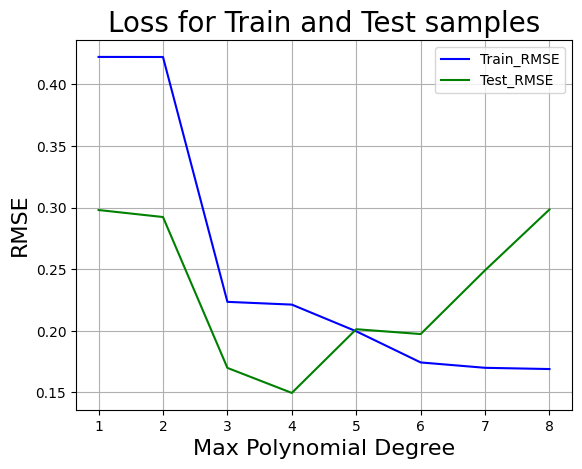

In [237]:
plt.plot(np.arange(1, 9), err_train, label="Train_RMSE", color="b")
plt.plot(np.arange(1, 9), err_test, label="Test_RMSE", color="g")
plt.title("Loss for Train and Test samples", fontsize=20)
plt.xlabel("Max Polynomial Degree", fontsize=16)
plt.ylabel("RMSE", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

Text(0.5, 0, 'X')

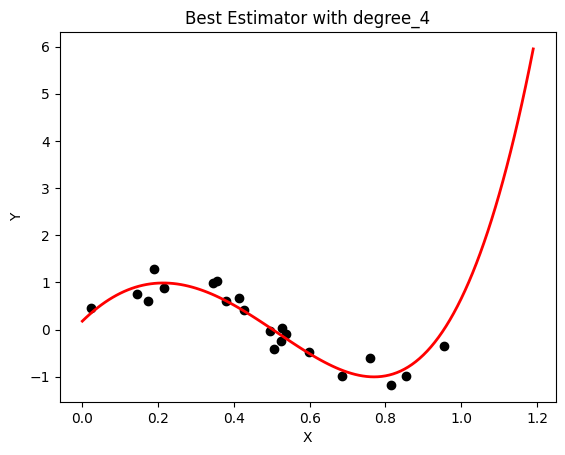

In [266]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=4, include_bias=True)
x_with_poly4 = poly.fit_transform(x.T)
x_train, x_test, y_train, y_test  = split_train_test(x_with_poly4, y.ravel(), test_ratio=0.2)
w = (np.linalg.inv(np.dot(x_train.T, x_train)) @ x_train.T @ y_train).ravel()
x_4 = np.arange(0, 1.2, 0.01)
y_4 = poly.fit_transform(np.expand_dims(x_4, axis=1)) @ w
plt.scatter(x, y, color="black")
plt.plot(x_4, y_4, color="red", lw=2)
plt.title("Best Estimator with degree_4")
plt.ylabel("Y")
plt.xlabel("X")

# Exercise 11.2. Naive cross-validation II

In [49]:
from itertools import combinations_with_replacement


a = [1, 2, 3]

combinations = np.array(list((combinations_with_replacement(a, 3))))

row_products = np.prod(combinations, axis=1).reshape(-1, 1).flatten()

print(row_products)

[ 1  2  3  4  6  9  8 12 18 27]


(2, 99)
(1, 99)


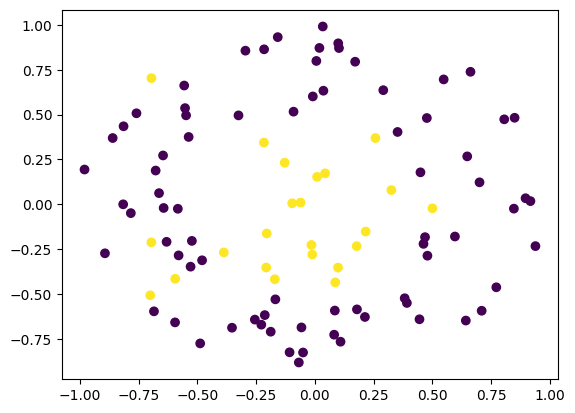

In [33]:
import numpy as np

csvname = datapath + 'new_circle_data.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

plt.scatter(x[0, :], x[1, :], c=y)

x = x.T
y = y.T

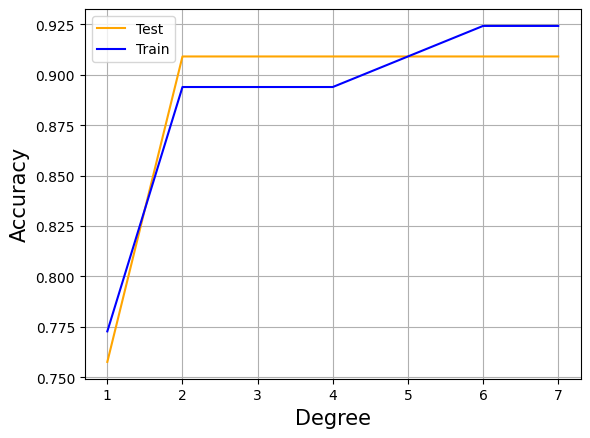

In [85]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


acc_test_list = []
acc_train_list = []
misclass_list_test = []
misclass_list_train = []

N = 7
model = LinearSVC(dual="auto")
for i in range(1, N+1):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_transformed = poly.fit_transform(X_train)
    X_test_transformed = poly.transform(X_test)
    model.fit(X_train_transformed, y_train.ravel())
    y_pred_test = model.predict(X_test_transformed)
    y_pred_train = model.predict(X_train_transformed)
    acc_test = accuracy_score(y_test.ravel(), y_pred_test)
    acc_train = accuracy_score(y_train.ravel(), y_pred_train)
    num_misclassified_test = (y_test.ravel() != y_pred_test).sum()
    num_misclassified_train = (y_train.ravel() != y_pred_train).sum()
    acc_test_list.append(acc_test)
    acc_train_list.append(acc_train)
    misclass_list_test.append(num_misclassified_test)
    misclass_list_train.append(num_misclassified_train)

plt.plot(np.arange(1, 8), acc_test_list, label="Test", c="orange")
plt.plot(np.arange(1, 8), acc_train_list, label="Train", c="blue")
plt.xlabel("Degree", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.grid(True)
plt.legend()

# Exercise 11.3. Boosting based cross-validation I

array([1., 2.])

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression



l = [1, 2, 3]
l = np.array(l, dtype=np.complex64)



def grad(f, x, w, y, h=1e-7):
    grads = np.array([])
    w = np.array(w, dtype=np.complex64)
    x = np.array(x, dtype=np.complex64)
    for i in range(len(w)):
        w_calc = w.copy()
        w_calc[i] = w_calc[i] + 1j*h
        grad_i = np.imag(f(w=w_calc, x=x, y=y)) / h
        grads = np.append(grads, grad_i)
    return grads
    
    

1.0

(2, 99)
(1, 99)


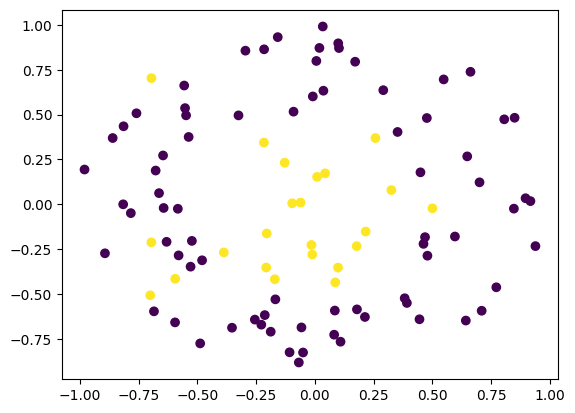

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

csvname = datapath + 'new_circle_data.csv'
data = np.loadtxt(csvname, delimiter = ',')

x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))
x = x.T
plt.scatter(x[:, 0], x[:, 1], c=y.ravel())
poly = PolynomialFeatures(degree=2, include_bias=False)

x = poly.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y.ravel(), test_size=0.2, random_state=101)

In [215]:
X_train.shape

(79, 5)

In [210]:
from sklearn.metrics import accuracy_score


class MLPUnit:
    def __init__(self, X, y):
        self.X = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        self.y = y.ravel()
        self.w = np.random.randn(self.X.shape[1])
        self.loss_list = []
    
    def model(self, x, w):
        return np.tanh(np.dot(x, w))

    @staticmethod
    def generate_batch(x, y, batch_size):
        indx = np.random.permutation(x.shape[0])
        choose = indx[:batch_size]
        yield x[choose], y[choose]

    @staticmethod
    def grad(f, x, w, y, h=1e-7):
        grads = np.array([])
        w = np.array(w, dtype=np.complex64)
        x = np.array(x, dtype=np.complex64)
        for i in range(len(w)):
            w_calc = w.copy()
            w_calc[i] = w_calc[i] + 1j*h
            grad_i = np.imag(f(w=w_calc, x=x, y=y)) / h
            grads = np.append(grads, grad_i)
        return grads

    def bin_softmax(self, x, w, y, eps=1e-9):
        return np.log(1 + np.exp(-y*self.model(x=x, w=w))).mean()

    def SGD(self, alpha=10e-3, epochs=50, batch_size=5, adam=False):
        for i in range(epochs):
            for batch_x, batch_y in self.generate_batch(self.X, self.y, batch_size):
                self.w -= alpha*self.grad(self.bin_softmax, batch_x, self.w, batch_y)
            self.loss_list.append(self.bin_softmax(self.X, self.w, self.y))
                    


intercept = y_train.mean()
w_final = np.array([])
y_current = y_train - y_train.mean()
y_list = []
w_final = np.append(w_final, y_train.mean())
M = 30
for i in range(M):
    test = MLPUnit(X_train.T, y_current)
    test.SGD(alpha=1, epochs=250, batch_size=15)
    y_pred = test.model(X_test.T, test.w)
    w_final = np.append(w_final, (y_current / y_pred).mean())
    result_curr = (y_current / y_pred).mean()*y_pred
    if type(y_list) != list:
        y_list = y_list.tolist()
    y_list.append(result_curr)
    y_list = np.array(y_list)
    y_current = y_current - (y_current / y_pred).mean()*y_pred
    y_final_curr = np.sign(np.sum(y_list, axis=0) + y.mean())
    print(accuracy_score(y.ravel(), y_final_curr))
    

0.7676767676767676
0.5151515151515151
0.7272727272727273
0.7272727272727273
0.6767676767676768
0.494949494949495
0.7777777777777778
0.8585858585858586
0.6868686868686869
0.46464646464646464
0.5757575757575758
0.8282828282828283
0.5050505050505051
0.5151515151515151
0.7272727272727273
0.8282828282828283
0.494949494949495
0.48484848484848486
0.696969696969697
0.5555555555555556
0.47474747474747475
0.5353535353535354
0.6767676767676768
0.5555555555555556
0.6363636363636364
0.5959595959595959
0.6060606060606061
0.7777777777777778
0.7878787878787878
0.696969696969697


In [160]:
w_final

array([-5.35353535e-01,  4.49243609e+01,  1.40842074e+01,  1.28794757e+01,
        5.66345789e+00, -2.64019996e-01,  8.86811577e-01,  5.18509315e+00,
        9.16306694e-01,  2.65542757e+00,  5.49031105e+01,  2.92876974e+01,
       -7.10465793e+00,  1.62775176e+01,  8.84840377e+00,  8.51145805e+00,
        9.05574197e+00,  4.18573791e+01,  2.77943879e+01,  7.95716238e+00,
        4.64510708e+01,  2.59163148e+01,  1.23056541e+01,  4.91002949e+01,
        2.50665212e+01,  7.15660293e+01,  3.53032912e+01,  1.97294908e+01,
        9.74362397e+00, -3.93541113e-01, -7.15447945e-02])

In [146]:
test.w

array([-2.22364607, -0.13895274, -0.17748563])

In [153]:
len(y[y == -1])

76

In [143]:
test.loss_list

[0.5606123480421038,
 0.5589956413974053,
 0.5582422626347251,
 0.5577893734002991,
 0.558600892113707,
 0.5567307551007267,
 0.555776497320124,
 0.5548272573435632,
 0.5548399694400012,
 0.5537680244234084,
 0.5551645135043977,
 0.5542403913353862,
 0.5541985523278511,
 0.555549195665798,
 0.5549953679545421,
 0.5549561361915887,
 0.554303920118817,
 0.553760148463216,
 0.5530504993707728,
 0.5524198366765614,
 0.5520428812825093,
 0.5517189843710002,
 0.5512625846540918,
 0.550671519006361,
 0.5504460473309724,
 0.5499600547317344,
 0.549996256460098,
 0.550025266778783,
 0.5498159449749068,
 0.5497516222380273,
 0.5496753092256946,
 0.54948998137963,
 0.5494930773917579,
 0.5492629720448159,
 0.5492236225947791,
 0.5492930705697392,
 0.5493330525075096,
 0.5493233978406561,
 0.5495343679773138,
 0.5494282928907213,
 0.549517383067634,
 0.549608855577788,
 0.549466020239332,
 0.5492837111400828,
 0.5493137573723185,
 0.5492172081804407,
 0.5492949773718475,
 0.549322659765324,
 0.549

In [ ]:
def generate_batch(x, y, batch_size=5):
    indx = np.random.permutation(x.shape[0])
    choose = indx[:batch_size]
    yield x[choose], y[choose]


N = 20
print(y.shape, x.shape)
for i in range(N):
    for batch_x, batch_y in generate_batch(x, y.ravel()):
        for x_sample, y_sample in zip(batch_x, batch_y):
            print(x_sample)
            print(y_sample)

In [44]:
y.reshape(y.shape[1])

array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1.])

In [39]:
np.ones((x.shape[0], 1)).shape

(99, 1)

In [38]:
x.shape

(99, 2)

In [90]:
def Bin_softmax(x, w, y, eps=1e-9):
    return np.log(1 + np.exp(-y*model(x=x, w=w))).mean()

def model(x, w):
    return np.tanh(np.dot(x, w))

y = np.array([-1, 1, 1])
w = np.random.uniform(low=-1, high=1, size=4)
x = np.array([[1, 2, 3, 4], [3, 2, 1, 4], [-1, -2, -3, -1]])
grad(Bin_softmax, x, w, y)

array([-0.00375522,  0.02266312,  0.04908145, -0.01067412])

In [91]:
x.shape

(3, 4)

In [3]:
def softmax(w, x, y):
    return np.log(1 + np.exp(-y*np.dot(

array([ 1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1.])

In [202]:



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

5

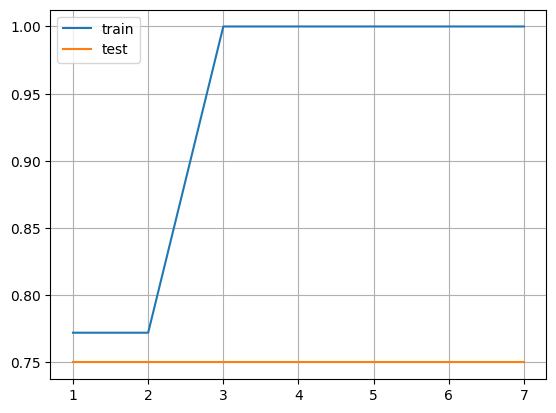

In [212]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
import random

model_list =  [SGDClassifier(loss="log_loss"), GradientBoostingClassifier(), Perceptron()]
acc_train = []
acc_test = []
estimators = []
M = 7
for i in range(M):
    estimators.append((f"clf {i}", random.choice(model_list)))
    clf = StackingClassifier(
     estimators=estimators, final_estimator=LogisticRegression()
 )
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    acc_train.append(accuracy_score(y_train, y_pred_train))
    acc_test.append(accuracy_score(y_test, y_pred_test))

plt.plot(np.arange(1, 8), acc_train, label="train")
plt.plot(np.arange(1, 8), acc_test, label="test")
plt.grid(True)
plt.legend()

In [146]:
from sklearn.linear_model import SGDRegressor

m_bias = SGDRegressor(fit_intercept=False)
ones = np.ones(X_train.shape[0])
m_bias.fit(ones.reshape(-1, 1), y_train)


SGDRegressor(fit_intercept=False)

In [147]:
m_bias.coef_

array([-0.47408745])

# Exercise 11.4. Boosting based cross-validation II

In [5]:
path  = '../mlrefined_datasets/superlearn_datasets/'
filename  = path + 'breast_cancer_original.txt'

data = pd.read_csv(filename, header = None)

# drop user id column
data.drop(0, axis=1, inplace=True)

# replace '?' missing entries with np.nan values
data.replace('?', np.nan,inplace = True)

# replace arbitrary label values with pm 1
data[10].replace([2,4], [-1,1], inplace = True)

# convert all entries to floats
data = data.astype(float)

# convert dataframe to numpy array
data = data.values

# cut into input/output pairs
x = data[:,:-1].T
y = data[:,-1:].T

print(np.shape(x))
print(np.shape(y))

(9, 699)
(1, 699)


# Exercise 11.5. Regularization based cross-validation

In [177]:
from sklearn.linear_model import SGDClassifier


csvname = datapath + 'new_circle_data.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

x = x.T
y = y.ravel()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

(2, 99)
(1, 99)


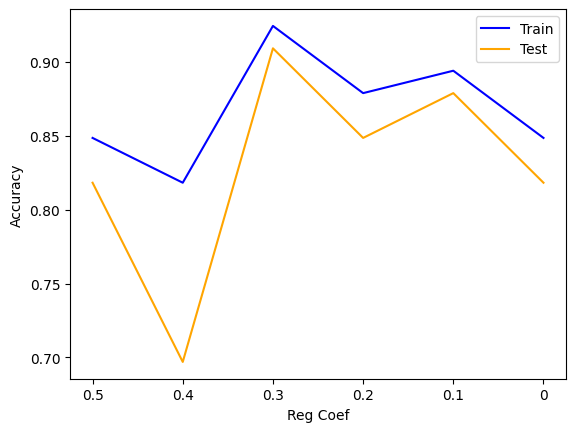

In [180]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
accuracy_train = []
accuracy_test = []

for i in range(6):
    model = SGDClassifier(eta0=0.01, learning_rate="constant", alpha=0.5-i*0.1, loss="perceptron")
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)

plt.plot([0.5, 0.4, 0.3, 0.2, 0.1, 0], accuracy_train, label="Train", c="blue")
plt.plot([0.5, 0.4, 0.3, 0.2, 0.1, 0], accuracy_test, label="Test", c="orange")
plt.xlabel("Reg Coef")
plt.ylabel("Accuracy")
plt.xticks([0.5, 0.4, 0.3, 0.2, 0.1, 0], [0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.legend()

# Exercise 11.6. Bagging regression models

In [223]:
# This code cell will not be shown in the HTML version of this notebook
# import data
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR, SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

csvname = datapath + 'noisy_sin_sample.csv'

data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

print(np.shape(x))
print(np.shape(y))

X_train, X_test, y_train, y_test = train_test_split(x.T, y.ravel(), test_size=0.2, random_state=101)

regr = BaggingRegressor(estimator=SVR(), n_estimators=10, random_state=0).fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"Bagging Regressor MSE: {mean_squared_error(y_test, y_pred, squared=False)}")

no_bag = SVR()
no_bag.fit(X_train, y_train)
y_pred = no_bag.predict(X_test)
print(f"One SVR MSE: {mean_squared_error(y_test, y_pred, squared=False)}")

(1, 21)
(1, 21)
Bagging Regressor MSE: 0.28545014521217493
One SVR MSE: 0.30295254494912865


# Exercise 11.7. Bagging two-class classification models

In [306]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score



csvname = datapath + 'new_circle_data.csv'

data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))

X_train, X_test, y_train, y_test = train_test_split(x.T, y.ravel(), test_size=0.25)

(2, 99)
(1, 99)


In [308]:
indx = np.random.permutation(len(X_train))
i1 = indx[:(len(X_train)//3)]
i2 = indx[(len(X_train)//3):(2*len(X_train)//3)]
i3 = indx[(len(X_train)//3):]

X_train_1_model = X_train[i1]
y_train_1_model = y_train[i1]

X_train_2_model = X_train[i2]
y_train_2_model = y_train[i2]

X_train_3_model = X_train[i3]
y_train_3_model = y_train[i3]

model1 = SVC(class_weight="balanced", kernel="poly", degree=2)
model2 = DecisionTreeClassifier(class_weight="balanced")
model3 = Perceptron(class_weight="balanced")

model1.fit(X_train_1_model, y_train_1_model)
model2.fit(X_train_2_model, y_train_2_model)
model3.fit(X_train_3_model, y_train_3_model)

y_svc = np.expand_dims(model1.predict(X_test), axis=1)
y_tree = np.expand_dims(model2.predict(X_test), axis=1)
y_percep = np.expand_dims(model3.predict(X_test), axis=1)

print("Bagger Classifier acc: ", accuracy_score(y_test, np.median(np.concatenate((y_svc, y_tree, y_percep), axis=1), axis=1)))
print("Decision Tree acc: ", accuracy_score(y_test, y_tree.ravel()))
print("SVC acc: ", accuracy_score(y_test, y_svc.ravel()))
print("perceptron acc: ", accuracy_score(y_test, y_percep.ravel()))

Bagger Classifier acc:  0.8
Decision Tree acc:  0.64
SVC acc:  0.72
perceptron acc:  0.76


# Exercise 11.8. Bagging multi-class classification models

(2, 107)
(1, 107)
Random Forest acc:  1.0
Decision Tree acc:  0.9545454545454546


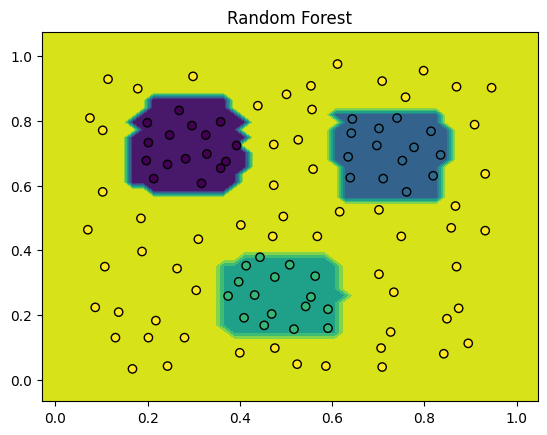

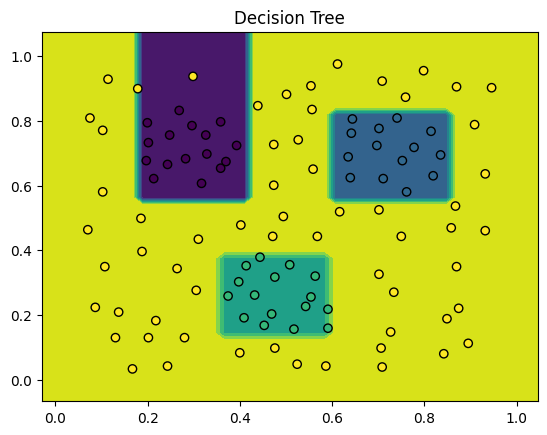

In [358]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier


csvname = datapath + '3eggs_multiclass.csv'

data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))


X_train, X_test, y_train, y_test = train_test_split(x.T, y.ravel(), test_size=0.2)
rf = RandomForestClassifier(criterion="entropy", n_estimators=1000, class_weight="balanced")
tree = DecisionTreeClassifier(criterion="entropy", class_weight="balanced")
rf.fit(X_train, y_train)
tree.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_tree = tree.predict(X_test)
print("Random Forest acc: ", accuracy_score(y_test, y_pred_rf))
print("Decision Tree acc: ", accuracy_score(y_test, y_pred_tree))


feature_1, feature_2 = np.meshgrid(

    np.linspace(x.T[:, 0].min() - 0.1, x.T[:, 0].max() + 0.1),

    np.linspace(x.T[:, 1].min()- 0.1, x.T[:, 1].max() + 0.1)
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred_rf_grid = np.reshape(rf.predict(grid), feature_1.shape)
y_pred_tree_grid = np.reshape(tree.predict(grid), feature_1.shape)
display_rf = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred_rf_grid)
display_rf.plot()
plt.title("Random Forest")
display_rf.ax_.scatter(x[0, :], x[1, :], c=y.ravel(), edgecolor="black")

display_tree = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred_tree_grid)
display_tree.plot()
plt.title("Decision Tree")
display_tree.ax_.scatter(x[0, :], x[1, :], c=y.ravel(), edgecolor="black")

# Exercise 11.9. K-fold cross-validation

In [367]:
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

csvname = datapath + 'galileo_ramp_data.csv'

data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

print(np.shape(x))
print(np.shape(y))

model = LinearRegression()
splitter = LeaveOneOut()
for i, (train_index, test_index) in enumerate(splitter.split(x.T)):
    poly = PolynomialFeatures(degree=i+1, include_bias=False)
    X = poly.fit_transform(x.T)
    model.fit(X[train_index], y.ravel()[train_index])
    y_pred = model.predict(X[test_index])
    print(f"MSE. Max_degree is {i+1}: ", mean_squared_error(y.ravel()[test_index], y_pred, squared=False))

(1, 6)
(1, 6)
MSE. Max_degree is 1:  0.5507335648654563
MSE. Max_degree is 2:  0.013334259118069847
MSE. Max_degree is 3:  0.016406270800931544
MSE. Max_degree is 4:  0.008451040346427963
MSE. Max_degree is 5:  0.012115618798152927
MSE. Max_degree is 6:  0.19538016713271156


# Exercise 11.10. Classification of diabetes

In [383]:
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier

csvname = datapath + 'new_gene_data.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:] 

print(np.shape(x))
print(np.shape(y))
splitter = KFold(n_splits=5, shuffle=True)

for i, (train_index, test_index) in enumerate(splitter.split(x.T)):
    model = SGDClassifier(penalty="l1", alpha=10**(-i), class_weight="balanced")
    model.fit(x.T[train_index], y.ravel()[train_index])
    y_pred = model.predict(x.T[test_index])
    print(f"Fold {i}, reg l1 is {10**(-i)}. Accuracy: ", accuracy_score(y.ravel()[test_index], y_pred))

(7128, 72)
(1, 72)
Fold 0, reg l1 is 1. Accuracy:  0.8666666666666667
Fold 1, reg l1 is 0.1. Accuracy:  0.9333333333333333
Fold 2, reg l1 is 0.01. Accuracy:  1.0
Fold 3, reg l1 is 0.001. Accuracy:  0.9285714285714286
Fold 4, reg l1 is 0.0001. Accuracy:  1.0


In [405]:
model = SGDClassifier(penalty="l1", alpha=0.01, class_weight="balanced")

X_train, X_test, y_train, y_test = train_test_split(x.T, y.ravel(), test_size=0.25, stratify=y.ravel())

model.fit(X_train, y_train)
print("Accuracy: ", accuracy_score(model.predict(X_test), y_test))

Accuracy:  1.0
